In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# --------------------
# 1. Generate the data
# --------------------
np.random.seed(42)

minus_size = 1000
plus_size = 1000
near_zero_size = (minus_size + plus_size) + 10000  # 2000 + 10000 = 12000

minus_data = np.random.uniform(-1.5, -0.4, minus_size)
near_zero_data = np.random.uniform(-0.4, 0.4, near_zero_size)
plus_data = np.random.uniform(0.4, 2.5, plus_size)

data = np.concatenate([minus_data, near_zero_data, plus_data])

# ------------------------
# 2. Build the KDE object
# ------------------------
kde = gaussian_kde(data)
# For plotting a smooth line, define an x-grid over the range of interest:
x_grid = np.linspace(-1.5, 2.5, 500)
pdf_values_grid = kde.evaluate(x_grid)

# ----------------------------------------------------------
# 3. Compute 1/pdf for each point on the x_grid (smooth plot)
# ----------------------------------------------------------
reweight_grid = 1.0 / pdf_values_grid

# ------------------------------------------------------------
# Option A: Plot reweight as a smooth function over the x-grid
# ------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the KDE on the first y-axis
sns.lineplot(x=x_grid, y=pdf_values_grid, color='blue', ax=ax1, label='KDE')
ax1.fill_between(x_grid, pdf_values_grid, alpha=0.3, color='blue')
ax1.set_xlabel("Value")
ax1.set_ylabel("Density (pdf)", color='blue')

# Create a second y-axis for 1/pdf
ax2 = ax1.twinx()
sns.lineplot(x=x_grid, y=reweight_grid, color='red', ax=ax2, label='1/pdf')
ax2.set_ylabel("Reweight (1/pdf)", color='red')

# Combine legends (optional)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title("KDE and Reweight Function (1/pdf)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------------
# Option B: If you specifically want 1/pdf for *each individual data point*, do this instead
# -----------------------------------------------------------------------------------------
# Evaluate the pdf at each data point
pdf_values_data = kde.evaluate(data)
reweight_data = 1.0 / pdf_values_data

# Sort them (just for a nicer plot line)
sort_idx = np.argsort(data)
sorted_data = data[sort_idx]
sorted_reweight = reweight_data[sort_idx]

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot KDE
sns.kdeplot(data, ax=ax1, fill=True, color='blue', label='KDE')
ax1.set_xlabel("Value")
ax1.set_ylabel("Density (pdf)", color='blue')

# Second axis for the scatter/line of 1/pdf at each data point
ax2 = ax1.twinx()
# To visualize, you can choose a scatter or a line:
ax2.scatter(sorted_data, sorted_reweight, s=10, color='red', alpha=0.5, label='1/pdf (per point)')
ax2.set_ylabel("Reweight (1/pdf)", color='red')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title("KDE and Reweight Function per Data Point")
plt.tight_layout()
plt.show()


Max KDE value: 1.089366
KDE value at x=2.5: 0.019739


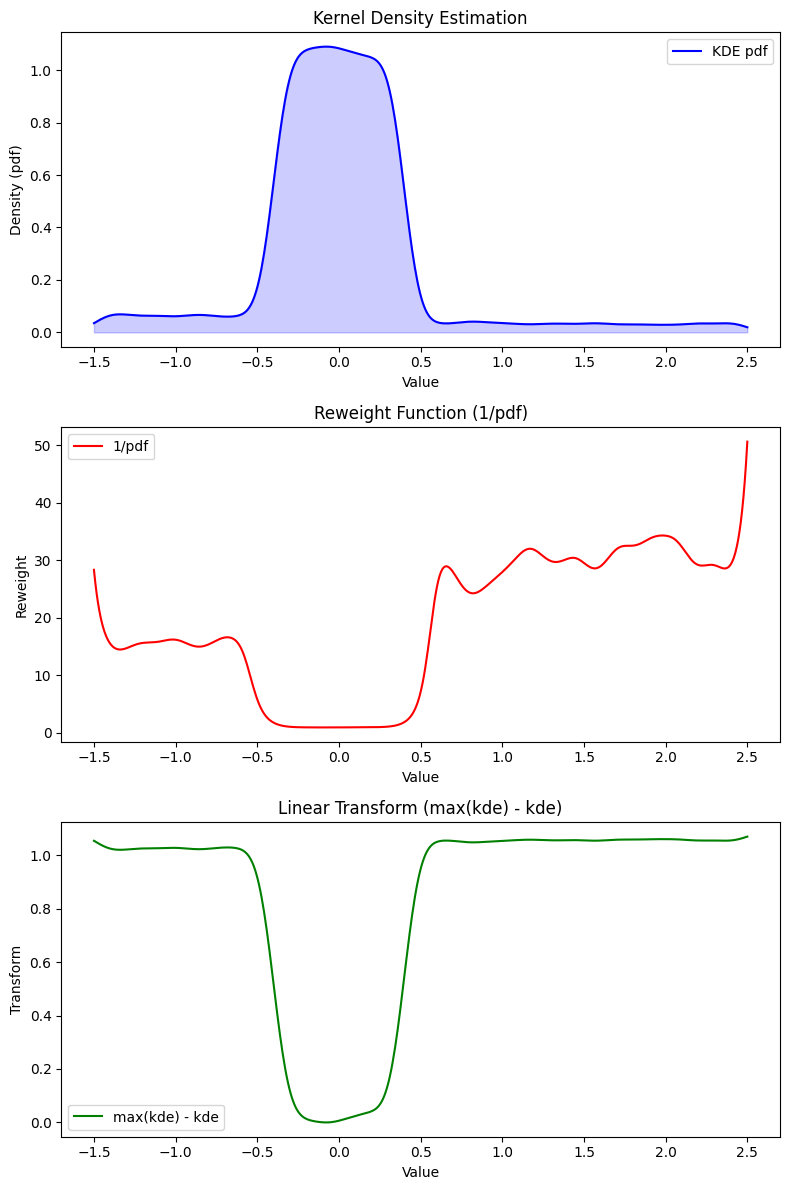

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# --------------------
# 1. Generate the data
# --------------------
np.random.seed(42)

minus_size = 1000
plus_size = 1000
near_zero_size = (minus_size + plus_size) + 10000  # 2000 + 10000 = 12000

minus_data = np.random.uniform(-1.5, -0.4, minus_size)
near_zero_data = np.random.uniform(-0.4, 0.4, near_zero_size)
plus_data = np.random.uniform(0.4, 2.5, plus_size)

data = np.concatenate([minus_data, near_zero_data, plus_data])

# ------------------------
# 2. Build the KDE object
# ------------------------
kde = gaussian_kde(data)
x_grid = np.linspace(-1.5, 2.5, 500)
pdf_values_grid = kde.evaluate(x_grid)

# -------------------------------------
# 3. Compute the two additional curves:
#    - Reweight: 1 / pdf(x)
#    - Linear reweighting: max(pdf) - pdf
# -------------------------------------
reweight_grid = 1.0 / pdf_values_grid

def lin_reweighting(pdf_values):
    """
    Compute linear reweighting: max(pdf) - pdf

    Parameters:
        pdf_values (np.ndarray): Array of PDF values.

    Returns:
        np.ndarray: Transformed values (max(pdf) - pdf).
    """
    max_pdf = np.max(pdf_values)
    return max_pdf - pdf_values

kde_transform_grid = lin_reweighting(pdf_values_grid)

# Print max kde and kde value at x=2.5
print(f"Max KDE value: {np.max(pdf_values_grid):.6f}")
print(f"KDE value at x=2.5: {kde.evaluate([2.5])[0]:.6f}")

# -------------------------------------------------------------
# 4. Plot each curve in its own subplot
# -------------------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plot 1: KDE (pdf)
sns.lineplot(x=x_grid, y=pdf_values_grid, ax=ax1, color='blue', label='KDE pdf')
ax1.fill_between(x=x_grid, y1=pdf_values_grid, color='blue', alpha=0.2)
ax1.set_xlabel("Value")
ax1.set_ylabel("Density (pdf)")
ax1.set_title("Kernel Density Estimation")
ax1.legend()

# Plot 2: Reweight (1/pdf)
sns.lineplot(x=x_grid, y=reweight_grid, ax=ax2, color='red', label='1/pdf')
ax2.set_xlabel("Value")
ax2.set_ylabel("Reweight")
ax2.set_title("Reweight Function (1/pdf)")
ax2.legend()

# Plot 3: Linear transform (max(kde) - kde)
sns.lineplot(x=x_grid, y=kde_transform_grid, ax=ax3, color='green', label='max(kde) - kde')
ax3.set_xlabel("Value")
ax3.set_ylabel("Transform")
ax3.set_title("Linear Transform (max(kde) - kde)")
ax3.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# --------------------
# 1. Generate the data
# --------------------
np.random.seed(42)

minus_size = 1000
plus_size = 1000
near_zero_size = (minus_size + plus_size) + 10000  # 2000 + 10000 = 12000

minus_data = np.random.uniform(-1.5, -0.4, minus_size)
near_zero_data = np.random.uniform(-0.4,  0.4,  near_zero_size)
plus_data  = np.random.uniform(0.4, 2.5, plus_size)

data = np.concatenate([minus_data, near_zero_data, plus_data])

# ------------------------
# 2. Build the KDE object
# ------------------------
kde = gaussian_kde(data)
x_grid = np.linspace(-1.5, 2.5, 500)
pdf_values_grid = kde.evaluate(x_grid)

# ------------------------------------------------------------
# 3. Define an inverted cosine bump that is high away from zero
#    and low near zero, within +/- 0.4
# ------------------------------------------------------------
def inverted_cosine_bump(x, alpha=0.3, limit=0.4):
    """
    Returns 1 - (cos( (pi/2) * (|x| / limit) ))^alpha for |x| <= limit,
    and 1 otherwise.
    """
    x = np.asarray(x)
    out = np.ones_like(x)  # Default to 1 outside the limit
    mask = np.abs(x) <= limit
    
    # Scale factor for the fraction within [-limit, +limit]
    frac = (np.abs(x[mask]) / limit)
    out[mask] = 1 - np.cos((np.pi/2) * frac) ** alpha
    
    return out

# Evaluate the inverted cosine bump on the same grid
bump_values_grid = inverted_cosine_bump(x_grid, alpha=0.3, limit=0.4)

# ---------------------------------------
# 4. Plot: KDE + the inverted cosine bump
# ---------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the KDE (pdf)
sns.lineplot(x=x_grid, y=pdf_values_grid, ax=ax1, color='blue', label='KDE pdf')
ax1.fill_between(x_grid, pdf_values_grid, color='blue', alpha=0.2)
ax1.set_xlabel("Value")
ax1.set_ylabel("Density (pdf)", color='blue')

# Use a second y-axis for the bump
ax2 = ax1.twinx()
sns.lineplot(x=x_grid, y=bump_values_grid, ax=ax2, color='green', label='inverted cosine bump')
ax2.set_ylabel("Inverted Cosine Bump", color='green')

# Merge legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title("KDE vs. Inverted Cosine Bump (Low Near Zero, High Away from Zero)")
plt.tight_layout()
plt.show()
